In [1]:
from PIL import Image
import os, glob

In [2]:
def resize_images(img_path):
    
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(scissor_image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [3]:
rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

resize_images(rock_image_dir_path)    # 바위 이미지 resize
print("바위 이미지 resize 완료!")
resize_images(paper_image_dir_path)   # 보 이미지 resize
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [4]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    return imgs, labels

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


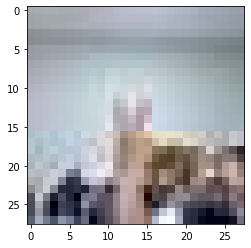

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [8]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 11ms/step - loss: 1.0937 - accuracy: 0.3900
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0737 - accuracy: 0.5100
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0430 - accuracy: 0.4433
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0021 - accuracy: 0.5967
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9511 - accuracy: 0.6200
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8736 - accuracy: 0.8867
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7486 - accuracy: 0.9167
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.8833
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.9200
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.9467


In [9]:
test_scissor_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(test_scissor_image_dir_path)   # 테스트 가위 이미지 resize

test_rock_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(test_rock_image_dir_path)   # 테스트 바위 이미지 resize

test_paper_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(test_paper_image_dir_path)   # 테스트 보 이미지 resize

400  images to be resized.
400  images resized.
400  images to be resized.
400  images resized.
400  images to be resized.
400  images resized.


In [10]:
def load_data2(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    return imgs, labels

In [11]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data2(image_dir_path)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (1200, 28, 28, 3)
y_test shape: (1200,)


In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

38/38 - 0s - loss: 224.8303 - accuracy: 0.4133
test_loss : 224.83033752441406
test_accuracy : 0.41333332657814026


In [13]:
def resize_images_new(img_path):
    
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [14]:
scissor_new_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images_new(scissor_new_image_dir_path)

print("가위 이미지 resize 완료!")

rock_new_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images_new(rock_new_image_dir_path)

print("바위 이미지 resize 완료!")

paper_new_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images_new(paper_new_image_dir_path)

print("보 이미지 resize 완료!")

400  images to be resized.
400  images resized.
가위 이미지 resize 완료!
400  images to be resized.
400  images resized.
바위 이미지 resize 완료!
400  images to be resized.
400  images resized.
보 이미지 resize 완료!


In [15]:
def load_data_new(img_path, number_of_data=1200):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("전체데이터(x_dataset)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [16]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_dataset, y_dataset)=load_data_new(image_dir_path)

print(f"x_dataset shape: {x_dataset.shape}")
print(f"y_dataset shape: {y_dataset.shape}")

전체데이터(x_dataset)의 이미지 개수는 1200 입니다.
x_dataset shape: (1200, 112, 112, 3)
y_dataset shape: (1200,)


## 데이터 분리

In [17]:
def train_val_test_split(ds, ds_size, sd,train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

x_train_new, x_val_new, x_test_new = train_val_test_split(x_dataset,1200,42)
y_train_new, y_val_new, y_test_new = train_val_test_split(y_dataset,1200,42)

In [18]:
print(x_train_new.shape)
print(x_val_new.shape)
print(x_test_new.shape)

print(y_train_new.shape)
print(y_val_new.shape)
print(y_test_new.shape)

(840, 112, 112, 3)
(180, 112, 112, 3)
(180, 112, 112, 3)
(840,)
(180,)
(180,)


라벨:  2


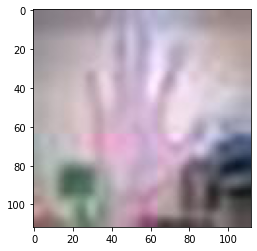

In [19]:
plt.imshow(x_train_new[0])
print('라벨: ', y_train_new[0])

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                692256    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

## 정규화 후 모델 학습

In [21]:
x_train_new_norm = x_train_new / 255.0

In [22]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_new_norm, y_train_new, epochs=10)

Epoch 1/10
27/27 [==============================] - 1s 10ms/step - loss: 1.1101 - accuracy: 0.4417
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: 0.7819 - accuracy: 0.6702
Epoch 3/10
27/27 [==============================] - 0s 6ms/step - loss: 0.4574 - accuracy: 0.8512
Epoch 4/10
27/27 [==============================] - 0s 6ms/step - loss: 0.3726 - accuracy: 0.8798
Epoch 5/10
27/27 [==============================] - 0s 6ms/step - loss: 0.2031 - accuracy: 0.9464
Epoch 6/10
27/27 [==============================] - 0s 6ms/step - loss: 0.1369 - accuracy: 0.9679
Epoch 7/10
27/27 [==============================] - 0s 6ms/step - loss: 0.1025 - accuracy: 0.9845
Epoch 8/10
27/27 [==============================] - 0s 6ms/step - loss: 0.1087 - accuracy: 0.9690
Epoch 9/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0668 - accuracy: 0.9893
Epoch 10/10
27/27 [==============================] - 0s 6ms/step - loss: 0.0605 - accuracy: 0.9857


## Validation set 을 이용한 모델 성능 평가

In [23]:
test_loss, test_accuracy = model.evaluate(x_val_new, y_val_new, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

6/6 - 0s - loss: 12.8402 - accuracy: 0.8833
test_loss : 12.84018325805664
test_accuracy : 0.8833333253860474


In [24]:
test_loss, test_accuracy = model.evaluate(x_test_new, y_test_new, verbose = 2)

print("Final test_loss : {}".format(test_loss))
print("Final test_accuracy : {}".format(test_accuracy))

6/6 - 0s - loss: 15.8649 - accuracy: 0.9056
Final test_loss : 15.864904403686523
Final test_accuracy : 0.9055555462837219


# 회고

### 데이터 분리시 트레인 비중이 60%일때 accuracy 87.5% | 70%일때 accuracy 90.5% | 80%일때 accuracy 74.1%

### 너무나도 어렵고 이해하기가 힘들었지만 전 기수들의 3명 내용들을 보며 다 대입해보고 시도하였을때 이미지수가 많을수록 accuracy 값이 좋게 나올것이라 예상 

### 다른 2명과는 다르게 데이터 분리를 통해 데이터수를 조정 후 학습을 하니 높은 accuracy 값이 도출됨

### 비록 구글링을 통해 몰랐던 부분을 어느정도 해소한 수준이지만 그래도 나름 의미있는 프로젝트였다고 생각됨

### 지난 번 프젝시에 배웠던 내용들이 어느정도 중복이 되어서 지난 익스를 하며 이해한 부분들을 조금은 접목할수 있어 뿌듯했음